In [1]:
from PIL import Image
import torch
from torchvision import transforms
from torch import nn
from torchvision.models import resnet34, ResNet34_Weights
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
IMG_SIZE = (224, 224)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [3]:
transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [4]:
model = resnet34(weights=ResNet34_Weights.DEFAULT)
model.fc = nn.Identity()
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
def extract_features(image_path):
    img = Image.open(image_path).convert('RGB')
    img = transform(img)

    img = img.unsqueeze(0).to(device)

    with torch.no_grad():
        features = model(img)

    return features.squeeze().cpu().numpy()

In [6]:
feature_list = []
image_names = []
for image_path in os.listdir("faces"):
    if image_path.endswith(".jpg"):
        features = extract_features(os.path.join("faces", image_path))
        feature_list.append(features)
        image_names.append(image_path)

In [7]:
features = np.array(feature_list)

In [8]:
features

array([[0.16722275, 0.05252771, 0.19711673, ..., 1.2881405 , 1.7179745 ,
        0.4431712 ],
       [0.29530263, 0.56057495, 0.14762665, ..., 1.1235942 , 0.08442286,
        0.37302324],
       [0.5315641 , 0.6925713 , 1.2303971 , ..., 0.8579261 , 0.11778807,
        0.13113046],
       ...,
       [0.84157956, 0.8058645 , 0.49772763, ..., 0.60978407, 0.91546696,
        0.00943048],
       [0.5140611 , 0.63674676, 2.1254435 , ..., 1.2695175 , 0.1741225 ,
        0.02355107],
       [0.09813651, 0.64918166, 1.2144786 , ..., 1.1375089 , 0.04082254,
        0.8044844 ]], dtype=float32)

In [9]:
df = pd.DataFrame(features)
df.insert(0, 'Image Name', image_names)
df.to_csv('features.csv', index=False)

In [10]:
df = pd.read_csv('features.csv')
df

Image Name         0         1         2         3  \
0     10003541_1937-09-27_1971.jpg  0.167223  0.052528  0.197117  1.403379   
1     10004299_1908-08-19_1950.jpg  0.295303  0.560575  0.147627  0.148633   
2     10005947_1981-04-07_2006.jpg  0.531564  0.692571  1.230397  1.840570   
3     10006850_1973-08-17_2010.jpg  0.038627  0.391582  0.240080  0.735266   
4      1000781_1930-07-07_2008.jpg  0.027990  0.644064  0.354977  1.459265   
...                            ...       ...       ...       ...       ...   
8619   9979824_1966-11-03_2008.jpg  0.425289  1.209261  2.230951  2.532599   
8620   9980109_1971-05-09_2014.jpg  0.570829  0.877508  0.043461  3.394836   
8621   9996683_1929-12-19_2008.jpg  0.841580  0.805864  0.497728  1.502671   
8622   9996763_1933-10-02_2008.jpg  0.514061  0.636747  2.125443  2.165727   
8623   9996824_1937-03-04_1962.jpg  0.098137  0.649182  1.214479  0.113671   

             4         5         6         7         8  ...       502  \
0     0.004028  0.350199  0.041637  0.846253  0.011490  ...  1.505452   
1     0.083633  0.756155  0.010373  0.187425  0.245777  ...  0.142504   
2     0.012356  0.013969  0.306114  1.103996  1.239578  ...  0.206027   
3     0.013004  0.029343  0.793633  0.085668  0.019546  ...  0.246701   
4     0.269854  1.376712  0.095513  1.157090  0.037941  ...  0.281456   
...        ...       ...       ...       ...       ...  ...       ...   
8619  1.434160  1.169575  1.310359  0.788094  0.526419  ...  0.349572   
8620  0.125024  1.475324  0.391504  0.557894  0.023650  ...  0.130413   
8621  0.376875  0.669647  0.332008  1.191234  0.261656  ...  1.919843   
8622  0.254266  1.365607  1.753959  0.662989  0.135733  ...  1.002496   
8623  0.029012  0.652949  0.040084  0.028790  0.143577  ...  0.000172   

           503       504       505       506       507       508       509  \
0     0.005799  0.722697  0.406628  0.219031  0.654528  0.545009  1.288140   
1     0.067107  2.113221  0.171248  1.049152  0.211254  0.084018  1.123594   
2     0.052111  0.411476  0.441548  0.606879  0.177223  0.776901  0.857926   
3     0.775610  0.746918  0.014426  2.546791  0.127904  0.608544  0.359910   
4     0.606690  1.240728  0.177480  3.383624  0.437968  0.068866  0.735867   
...        ...       ...       ...       ...       ...       ...       ...   
8619  0.094153  1.074548  0.083105  3.736792  1.455255  3.345130  2.155098   
8620  0.725100  1.159213  0.231002  3.664370  2.195410  0.830726  0.510396   
8621  0.288910  1.191088  0.000364  1.443875  1.044826  0.670764  0.609784   
8622  0.620521  0.172862  0.105835  3.403685  1.024804  0.085074  1.269518   
8623  0.389525  1.631039  0.612464  1.234447  0.284840  0.000356  1.137509   

           510       511  
0     1.717974  0.443171  
1     0.084423  0.373023  
2     0.117788  0.131130  
3     0.051739  0.142239  
4     0.022145  0.168094  
...        ...       ...  
8619  0.493607  0.161751  
8620  0.073238  0.053436  
8621  0.915467  0.009430  
8622  0.174123  0.023551  
8623  0.040823  0.804484  

[8624 rows x 513 columns]

In [11]:
model = model.to('cpu')

[182 473 220 361  70 256 141 496 492  90]


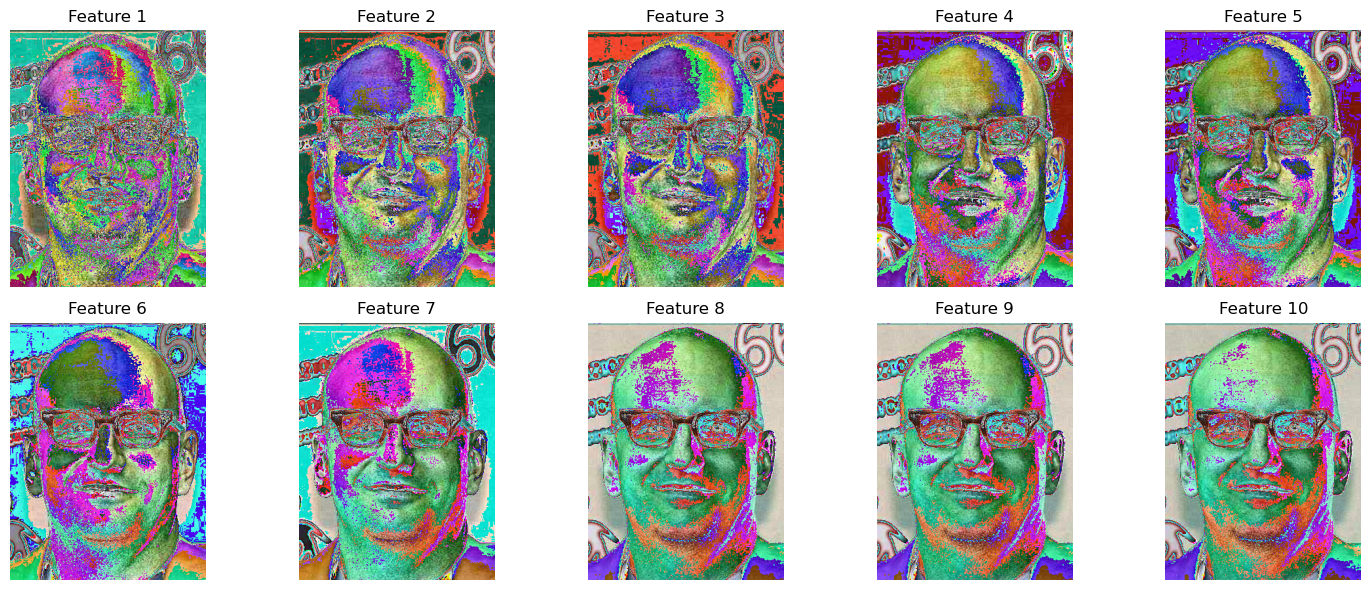

In [12]:
def grad_cam(model, image_path, top_k=10):
    # Set the model to evaluation mode
    model.eval()

    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a PIL Image
    image_pil = Image.fromarray(image)

    # Convert the image to a tensor and normalize it
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image_tensor = preprocess(image_pil).unsqueeze(0)

    # Forward pass
    with torch.no_grad():
        features = model(image_tensor)

    # Get the top k features
    top_features = torch.topk(features, k=top_k)[1].squeeze().cpu().numpy()
    print(top_features)

    # Visualize the top features on the original image
    plt.figure(figsize=(15, 6))
    for i, feature_index in enumerate(top_features):
        # Multiply feature importance with original image pixels
        highlighted_image = image * features[0, feature_index].item()
        plt.subplot(top_k // 5, 5, i + 1)
        plt.imshow(highlighted_image.astype(np.uint8))
        plt.title(f'Feature {i + 1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Load an example image
image_path = "faces/27337_1963-01-14_2009.jpg"

# Generate Grad-CAM visualization
grad_cam(model, image_path)

In [13]:
from collections import Counter
from tqdm import tqdm


def grad_cam_top_features(model, image_path, top_k=10):
    # Set the model to evaluation mode
    model.eval()

    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a PIL Image
    image_pil = Image.fromarray(image)

    # Convert the image to a tensor and normalize it
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image_tensor = preprocess(image_pil).unsqueeze(0)

    # Forward pass
    with torch.no_grad():
        features = model(image_tensor)

    # Get the top k features
    top_features = torch.topk(features, k=top_k)[1].squeeze().cpu().numpy()

    # Return top features along with their importance scores
    importance_scores = features.squeeze().cpu().numpy()
    top_feature_importance = [(feature_index, importance_scores[feature_index]) for feature_index in top_features]
    return top_feature_importance


def find_top_n_features(images, top_n=10, top_k=10):
    # Dictionary to store the frequency of appearance for each feature
    feature_frequency = Counter()

    # Iterate over all images with tqdm for progress bar
    for image_path in tqdm(images, desc="Processing images"):
        top_feature_importance = grad_cam_top_features(model, image_path, top_k=top_k)
        top_n_features = top_feature_importance[:top_n]
        # Increment the frequency count for each top feature
        for feature_index, _ in top_n_features:
            feature_frequency[feature_index] += 1

    # Get the top n features with the highest frequency of appearance
    top_n_features = feature_frequency.most_common(top_n)
    return top_n_features

In [14]:
# Load all image paths
images_folder = "faces"
image_paths = [os.path.join(images_folder, img) for img in os.listdir(images_folder) if img.endswith(".jpg")]

# Find top n features with most appearance
top_n_features = find_top_n_features(image_paths)
print("Top n features with most appearance:")
for feature_index, frequency in top_n_features:
    print(f"Feature {feature_index}: {frequency} times")

Processing images: 100%|██████████| 8624/8624 [06:14<00:00, 23.01it/s]

Top n features with most appearance:
Feature 182: 8338 times
Feature 497: 5580 times
Feature 78: 5528 times
Feature 70: 4686 times
Feature 361: 4254 times
Feature 186: 3994 times
Feature 220: 3408 times
Feature 221: 3366 times
Feature 326: 3275 times
Feature 224: 2109 times


In [15]:
first_elements = [tup[0] for tup in top_n_features]
first_elements

[182, 497, 78, 70, 361, 186, 220, 221, 326, 224]

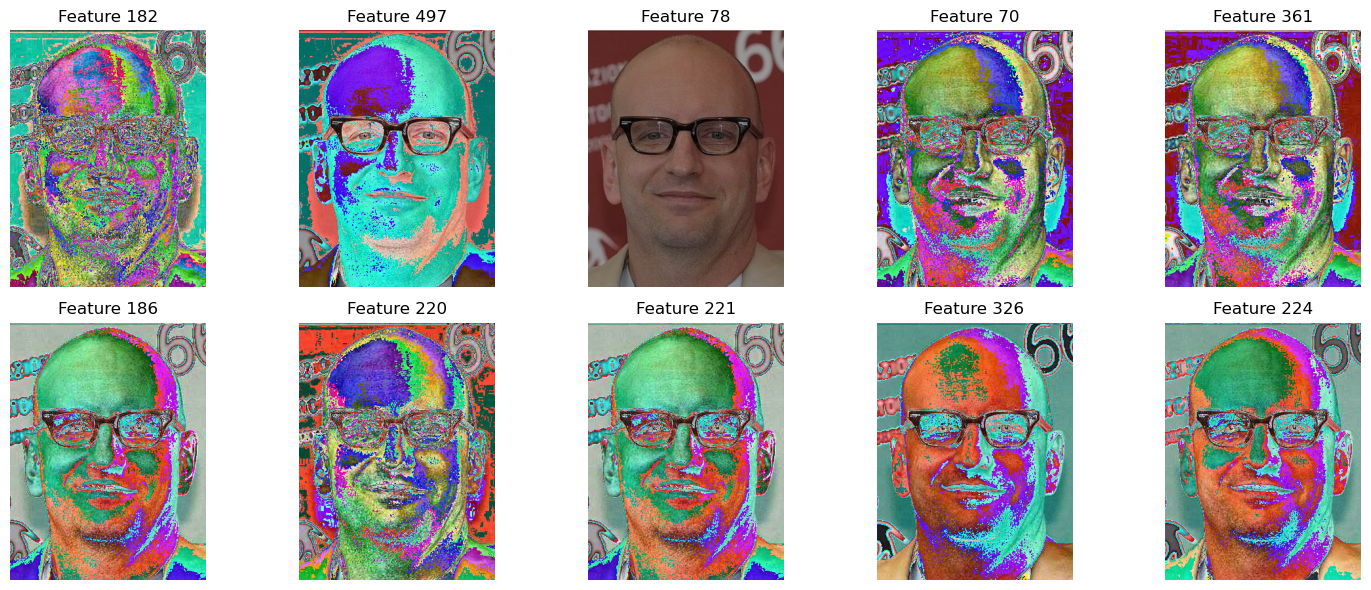

In [16]:
def grad_cam(model, image_path, top_k=10):
    # Set the model to evaluation mode
    model.eval()

    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to a PIL Image
    image_pil = Image.fromarray(image)

    # Convert the image to a tensor and normalize it
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image_tensor = preprocess(image_pil).unsqueeze(0)

    # Forward pass
    with torch.no_grad():
        features = model(image_tensor)

    # Visualize the top features on the original image
    plt.figure(figsize=(15, 6))
    for i, feature_index in enumerate(first_elements):
        # Multiply feature importance with original image pixels
        highlighted_image = image * features[0, feature_index].item()
        plt.subplot(top_k // 5, 5, i + 1)
        plt.imshow(highlighted_image.astype(np.uint8))
        plt.title(f'Feature {feature_index}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Load an example image
image_path = "faces/27337_1963-01-14_2009.jpg"

# Generate Grad-CAM visualization
grad_cam(model, image_path)

In [17]:
feature_std = np.std(features, axis=0)

In [29]:
# descending sort feature_std
sorted_indices = np.argsort(feature_std)[::-1]
sorted_indices

array([ 57,  78, 497, 220, 179, 182, 314, 445, 186, 361, 224,  70, 326,
       141, 256, 506, 485,  42, 167, 473, 258,  47,  51,  92, 153, 174,
       350, 133, 281, 152, 332, 492, 448,  35, 221, 293, 242, 387, 228,
       339, 175,  77, 165, 479, 457,  90, 219, 277,  71, 351, 483, 429,
       127, 447, 337,   3, 420,  40, 352,   9, 139, 496, 217, 392, 255,
       446, 460, 253, 385, 493, 146, 301, 117, 311, 115,  30, 171, 501,
       280,   6, 265, 173, 320, 126, 346, 481, 313, 222,  75, 249, 229,
       409, 284, 203, 297, 263, 286, 119, 259, 302, 187, 465, 443,  97,
       490, 208, 395, 164,  86, 287,  53, 373,  16, 151, 437, 322, 336,
       467, 449, 407, 195, 489, 147, 364, 402,  46, 207, 274,  15, 384,
       300,  50, 504, 329,  99, 123, 169, 411, 160,  10, 507, 494, 398,
        80, 137, 368, 272, 397, 386, 128, 396,  95, 341, 424, 419,   8,
       252, 271, 427,  29, 318, 107, 416, 403,  18, 359,   5, 466,  38,
        79, 470, 335, 211, 428,  20, 118,  32,  93, 155, 130,  4

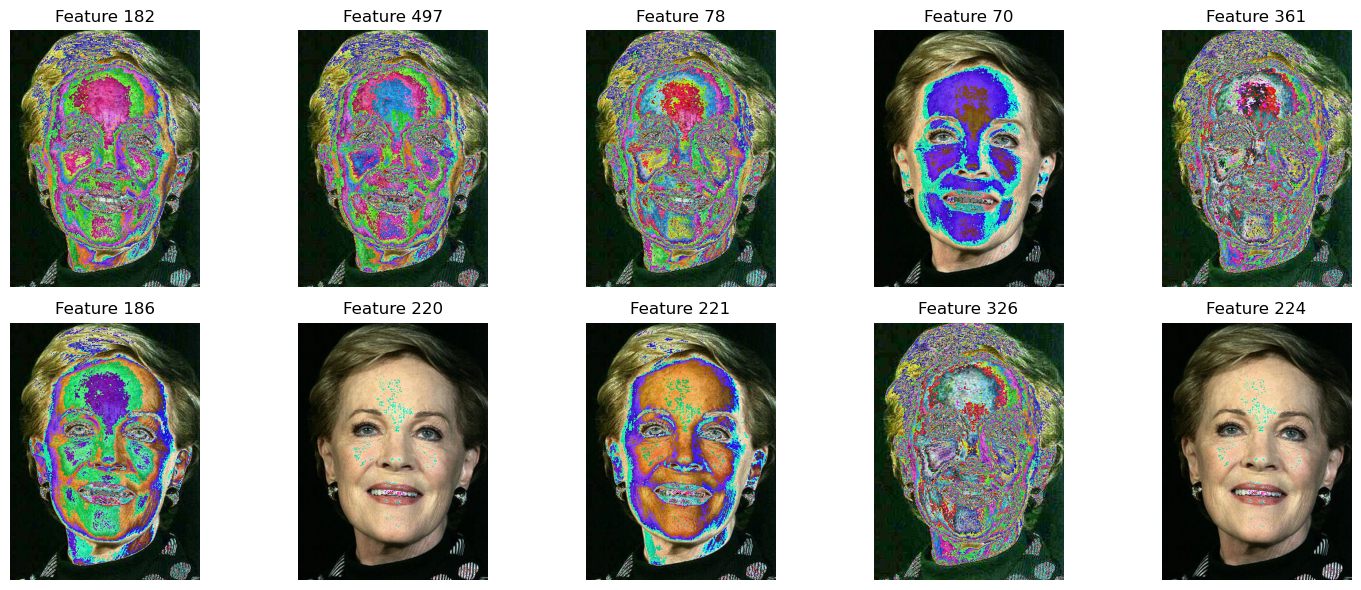

In [31]:
image_path = "faces/78239_1935-10-01_2013.jpg"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 6))
for i, feature_index in enumerate(first_elements):
    # Multiply feature importance with original image pixels
    highlighted_image = image * features[0, feature_index].item()
    plt.subplot(10 // 5, 5, i + 1)
    plt.imshow(highlighted_image.astype(np.uint8))
    plt.title(f'Feature {feature_index}')
    plt.axis('off')
plt.tight_layout()
plt.show()